In [5]:
import numpy as np
import math as m
from tabulate import tabulate
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit


Consider a Schrodinger equation for a negative potential well:
$
\frac{d^2\psi}{dx^2} + k^2(x)\psi(x) = 0
$

where $ k^2(x) = \frac{2m}{\hbar^2}(E - V(x)), $ and $ V(x) = \begin{cases}
0, & \text{for } |x| > 1 \\
-\frac{V_0(1 - x)}{2}, & \text{for } |x| \leq 1
\end{cases}$




where $V_0 = 40$. We aim to find the eigenvalues and eigenfunctions associated with this potential.



In [6]:
# The potential
def pot(x,Lo,Vo):
    if abs(x)>Lo:
        return 0.0
    else:
        return -Vo*((1-x)/2)

# The rhs of Schoedinger equation (using vectorized form)
def odefun2(x,y,E,Lo,Vo):
    k2 = E - pot(x,Lo,Vo);
    return np.array([y[1], -k2 * y[0]])



def rk4(f,x,y,k,h,Lo,Vo):
    k1 = h*f(x,y,k,Lo,Vo)
    k2 = h*f(x + h/2, y + k1/2, k,Lo,Vo)
    k3 = h*f(x + h/2, y + k2/2, k,Lo,Vo)
    k4 = h*f(x + h, y + k3, k,Lo,Vo)
    return y + (k1+2*k2+2*k3+k4)/6


def caller_rk4(f,xlim,yini,k,N,Lo,Vo):
    x1, x2 = xlim
    xs = np.linspace(x1, x2, N)
    h = xs[1] - xs[0]
    y = yini
    ys = np.zeros((N,len(yini)))
    for i in range(N):
        ys[i] = np.array(y)
        y = rk4(f, xs[i], y, k, h,Lo,Vo)
    return xs, ys

    # The score. Note: we are integrating from right and from left and checking the difference at one of the turning points.
def score2(E,f,ybound,Lo,Vo):
    yini1 = (ybound[0], 1.0e-2);
    xs1, ys1 = caller_rk4(odefun2,xlim,yini1,E,N,Lo,Vo)
    a = abs(xs1 + Lo);
    n1=np.where(a == np.min(a))[0][0]
    yini2 = (ybound[1], 1.0e-2)
    xs2, ys2 = caller_rk4(odefun2,xlim[-1::-1],yini2,E,N,Lo,Vo)
    a = abs(xs2 + Lo);
    n2=np.where(a == np.min(a))[0][0]
    ys2 = ys1[n1][0]*ys2/ys2[n2][0]
    return ys1[n1][1] - ys2[n2][1]


def secant(ks,f,method,ybound,Lo,Vo):
    k1, k2 = ks
    iter = 0
    while abs(method(k2,f,ybound,Lo,Vo))>tol and iter<maxiter:
        f1 = method(k1,f,ybound,Lo,Vo)
        f2 = method(k2,f,ybound,Lo,Vo)
        k1, k2 = k2, (f2*k1 - f1*k2)/(f2 - f1)
        iter += 1
        print(iter, k1, k2, method(k2,f,ybound,Lo,Vo))
    if iter == maxiter:
        return iter, None
    else:
        return iter, k2




In [7]:
Vo = 40.0
Lo = 1.0
xlim = (-2.0, 2.0)
ybound = (0.0, 0.0)

yini = (ybound[0], 0.1) # 1.0e-2 is an arbitrary number finally adjusted by

N = 129
maxiter = 50
tol = 1.0e-5

In [8]:
Es = np.linspace(-Vo, 0, 1000);
scores = [score2(E, odefun2, ybound,Lo,Vo) for E in Es];

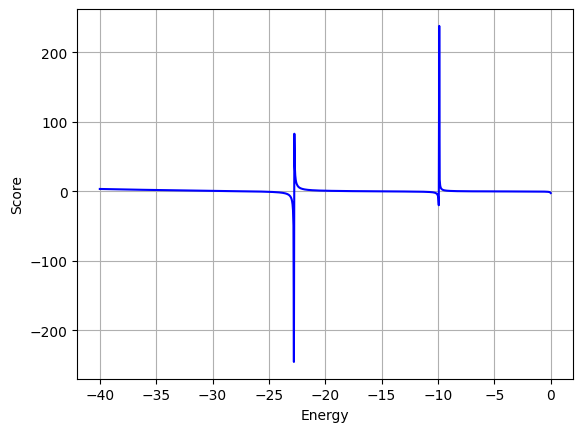

In [9]:
plt.plot(Es,scores,'b-');
plt.grid()
plt.xlabel("Energy");
plt.ylabel("Score");

In [11]:
Eini1=(-27,-26)
iter,Eeigen1 = secant(Eini1,odefun2,score2,ybound,Lo,Vo);


1 -26 -26.258067215121113 0.008983072191463215
2 -26.258067215121113 -26.231498131653545 0.00036035048802196545
3 -26.231498131653545 -26.230387788246542 -1.6693476359019854e-06


Text(0, 0.5, '$\\psi$')

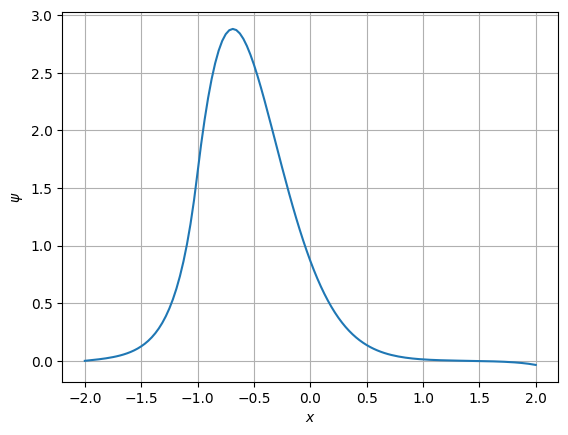

In [12]:
xs1, ys1 = caller_rk4(odefun2, xlim, yini, Eeigen1, N,Lo,Vo);
y11 = [y[0] for y in ys1];
plt.plot(xs1, y11);
plt.grid();
plt.xlabel("$x$")
plt.ylabel("$\\psi$")

In [14]:
Eini2=(-14,-13)
iter,Eeigen2 = secant(Eini2,odefun2,score2,ybound,Lo,Vo);

1 -13 -13.659073050326413 0.0022779103451328886
2 -13.659073050326413 -13.640007599064537 0.0001433745311998913
3 -13.640007599064537 -13.63872699270556 -2.253143437658256e-07


Text(0, 0.5, '$\\psi$')

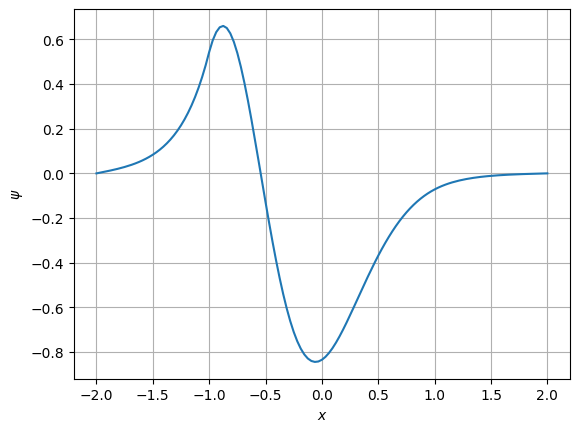

In [15]:
xs2, ys2 = caller_rk4(odefun2, xlim, yini, Eeigen2, N,Lo,Vo);
y12 = [y[0] for y in ys2];
plt.plot(xs2, y12);
plt.grid();
plt.xlabel("$x$")
plt.ylabel("$\\psi$")

In [16]:
Eini3=(-4,-3)
iter,Eeigen3 = secant(Eini3,odefun2,score2,ybound,Lo,Vo);

1 -3 -3.6655760626499525 -0.00012025992235397201
2 -3.6655760626499525 -3.668568053785199 1.2811557461092637e-07


Text(0, 0.5, '$\\psi$')

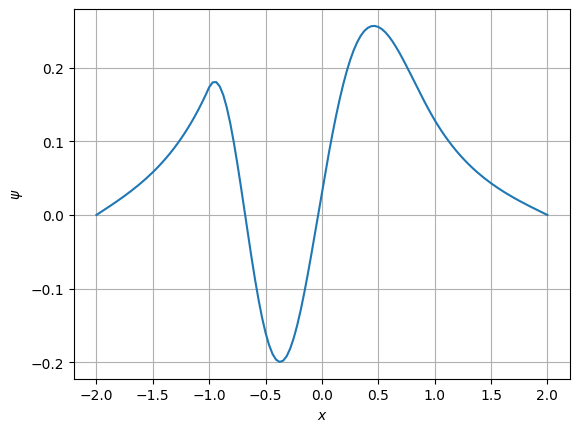

In [17]:
xs3, ys3 = caller_rk4(odefun2, xlim, yini, Eeigen3, N,Lo,Vo);
y13 = [y[0] for y in ys3];
plt.plot(xs3, y13);
plt.grid();
plt.xlabel("$x$")
plt.ylabel("$\\psi$")

In [95]:
print(f"Eigenvalues are: {Eeigen1,Eeigen2,Eeigen3} ")

Eigenvalues are: (-26.230387788246542, -13.63872699270556, -3.668568053785199) 


# Part B


#Here, $ V = x^2$, so comparing with simple harmonic oscialltor we can say, $\frac{1}{2} m \omega^2 =1$ and $ \frac{2m}{\hbar}=1$.
#  Therefore,  $ \hbar \omega = 2 \\⇒ E= \hbar \omega \frac{(2n+1)}{2} = (2n+1) $
$ \therefore $ Energy eigenvalues will come in odd integers; 1,3,5,9

In [54]:
xlimx = (-5.0, 5.0) # Choosing -5 and 5 as xlim as solution of this problem is gaussian and at |x| <5 it get almost die down to 0.
yboundx = (0.0, 0.0)

yinix = (yboundx[0], 0.1) # 1.0e-2 is an arbitrary number finally adjusted by

N =250
maxiter = 50
tol = 1.0e-5

In [100]:
# The potential
def pot2(x):
        return x**2

# The rhs of Schoedinger equation (using vectorized form)
def odefun(x,y,E,g):
    k2 = E - g(x);
    return np.array([y[1], -k2 * y[0]])

def rk4x(f,x,y,k,h,g):
    k1 = h*f(x,y,k,g)
    k2 = h*f(x + h/2, y + k1/2, k,g)
    k3 = h*f(x + h/2, y + k2/2, k,g)
    k4 = h*f(x + h, y + k3, k,g)
    return y + (k1+2*k2+2*k3+k4)/6


def caller_rk4x(f,xlim,yini,k,N,g):
    x1, x2 = xlim
    xs = np.linspace(x1, x2, N)
    h = xs[1] - xs[0]
    y = yini
    ys = np.zeros((N,len(yini)))
    for i in range(N):
        ys[i] = np.array(y)
        y = rk4x(f, xs[i], y, k, h,g)
    return xs, ys

    # The score. Note: we are integrating from right and from left and checking the difference at one of the turning points.
def score2x(E,f,ybound,g):
    yini1 = (yboundx[0], 1.0e-2);
    xs1, ys1 = caller_rk4x(odefun,xlimx,yini1,E,N,g)
    a = abs(xs1+1)
    n1=np.where(a == np.min(a))[0][0]
    yini2 = (yboundx[1], 1.0e-2)
    xs2, ys2 = caller_rk4x(odefun,xlimx[-1::-1],yini2,E,N,g)
    a = abs(xs2+1)
    n2=np.where(a == np.min(a))[0][0]
    ys2 = ys1[n1][0]*ys2/ys2[n2][0]
    return ys1[n1][1] - ys2[n2][1]


def secantx(ks,f,method,ybound,g):
    k1, k2 = ks
    iter = 0
    while abs(method(k2,f,ybound,g))>tol and iter<maxiter:
        f1 = method(k1,f,ybound,g)
        f2 = method(k2,f,ybound,g)
        k1, k2 = k2, (f2*k1 - f1*k2)/(f2 - f1)
        iter += 1
        print(iter, k1, k2, method(k2,f,ybound,g))
    if iter == maxiter:
        return iter, None
    else:
        return iter, k2




In [101]:
Es2 = np.linspace(0, 15, 1000);
scores2 = [score2x(E, odefun, yboundx,pot2) for E in Es2];

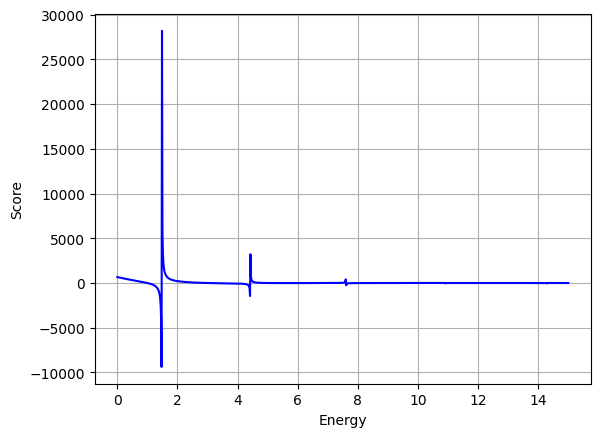

In [143]:
plt.plot(Es2,scores2,'b-');
plt.grid()
plt.xlabel("Energy");
plt.ylabel("Score");

In [144]:
Eini1_x=(0.9,1.1)
iter,Eeigen1_x = secantx(Eini1_x,odefun,score2x,yboundx,pot2)
print(f'\n Energy Eigenvalue corresponding to ground state is: {Eeigen1_x}')

1 1.1 0.9895789994408528 8.129076653503915
2 0.9895789994408528 0.9987889719449632 0.9533791684395396
3 0.9987889719449632 1.0000126294285174 -0.00993315003427142
4 1.0000126294285174 1.0000000117414583 1.2198816335740048e-05
5 1.0000000117414583 1.0000000272181246 1.5631940186722204e-10

 Energy Eigenvalue corresponding to ground state is: 1.0000000272181246


Text(0, 0.5, '$\\psi_0(x)$')

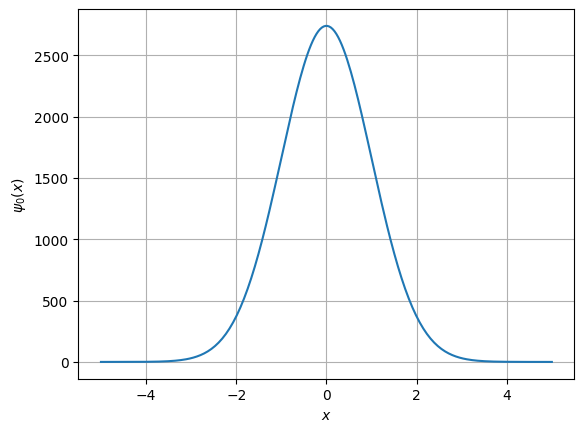

In [145]:
xs1_x, ys1_x = caller_rk4x(odefun, xlimx, yinix, Eeigen1_x, N,pot2);
y11_x = [y[0] for y in ys1_x];
plt.plot(xs1_x, y11_x);
plt.grid();
plt.xlabel("$x$")
plt.ylabel("$\\psi_0(x)$")

In [146]:
Eini2_x=(2.9,3.1)
iter,Eeigen2_x = secantx(Eini2_x,odefun,score2x,yboundx,pot2);
print(f'\n Energy Eigenvalue corresponding to first excited state is: {Eeigen2_x}')

1 3.1 3.0064833014749506 -0.5402878635426325
2 3.0064833014749506 2.99957813172692 0.03535106606826077
3 2.99957813172692 3.0000021911492745 -0.000148816788437367
4 3.0000021911492745 3.000000413476892 -4.080677085127604e-08

 Energy Eigenvalue corresponding to first excited state is: 3.000000413476892


Text(0, 0.5, '$\\psi_1(x)$')

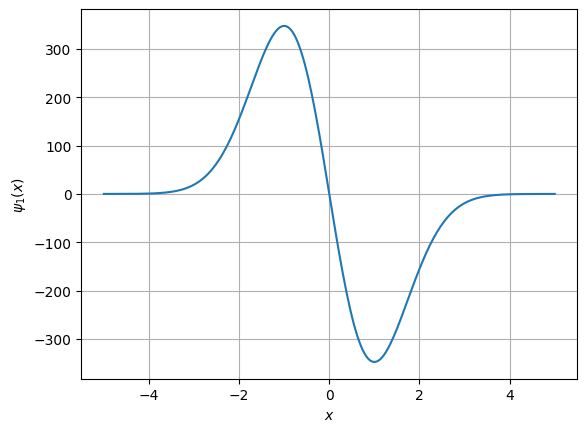

In [147]:
xs2_x, ys2_x = caller_rk4x(odefun, xlimx, yinix, Eeigen2_x, N,pot2);
y12_x = [y[0] for y in ys2_x];
plt.plot(xs2_x, y12_x);
plt.grid();
plt.xlabel("$x$")
plt.ylabel("$\\psi_1(x)$")

In [148]:
Eini3_x=(4.9,5.1)
iter,Eeigen3_x = secantx(Eini3_x,odefun,score2x,yboundx,pot2);

print(f'\n Energy Eigenvalue corresponding to second excited state is: {Eeigen3_x}')

1 5.1 5.0216107709212965 -0.7769788749230688
2 5.0216107709212965 4.994984106921393 0.19108818847616327
3 4.994984106921393 5.000239983483332 -0.008962280869303285
4 5.000239983483332 5.000004519692037 -9.77564790716201e-05
5 5.000004519692037 5.000001923037082 5.068667086050027e-08

 Energy Eigenvalue corresponding to second excited state is: 5.000001923037082


Text(0, 0.5, '$\\psi_2(x)$')

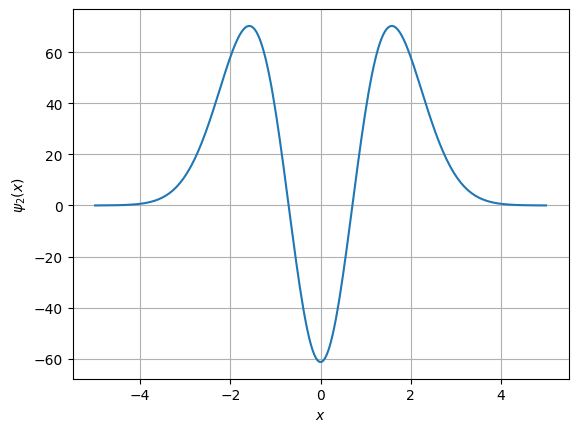

In [149]:
xs3_x, ys3_x = caller_rk4x(odefun, xlimx, yinix, Eeigen3_x, N,pot2);
y13_x = [y[0] for y in ys3_x];
plt.plot(xs3_x, y13_x);
plt.grid();
plt.xlabel("$x$")
plt.ylabel("$\\psi_2(x)$")

In [150]:
Eini4_x=(6.9,7.1)
iter,Eeigen4_x = secantx(Eini4_x,odefun,score2x,yboundx,pot2);

print(f'\n Energy Eigenvalue corresponding to third excited state is: {Eeigen4_x}')

1 7.1 6.990874808193383 -0.10068748005530992
2 6.990874808193383 6.999117200297274 -0.009884373685479453
3 6.999117200297274 7.000014426029676 8.068424283447229e-05
4 7.000014426029676 7.000007161447836 -6.461611867791817e-08

 Energy Eigenvalue corresponding to third excited state is: 7.000007161447836


Text(0, 0.5, '$\\psi_3$')

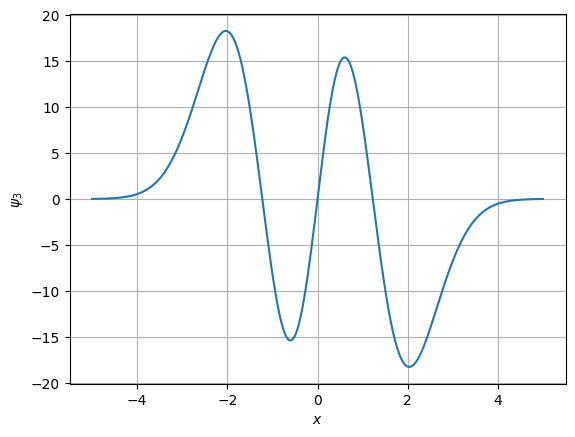

In [151]:
xs4_x, ys4_x = caller_rk4x(odefun, xlimx, yinix, Eeigen4_x, N,pot2);
y14_x = [y[0] for y in ys4_x];
plt.plot(xs4_x, y14_x);
plt.grid();
plt.xlabel("$x$")
plt.ylabel("$\\psi_3$")

In [152]:
Eini5_x=(8.95,9.01)
iter,Eeigen5_x = secantx(Eini5_x,odefun,score2x,yboundx,pot2);

print(f'\n Energy Eigenvalue corresponding to fourth excited state is: {Eeigen5_x}')

1 9.01 9.000394007628394 0.0007766368585486183
2 9.000394007628394 9.000032622461207 -5.64008450348874e-06

 Energy Eigenvalue corresponding to fourth excited state is: 9.000032622461207


Text(0, 0.5, '$\\psi_4$')

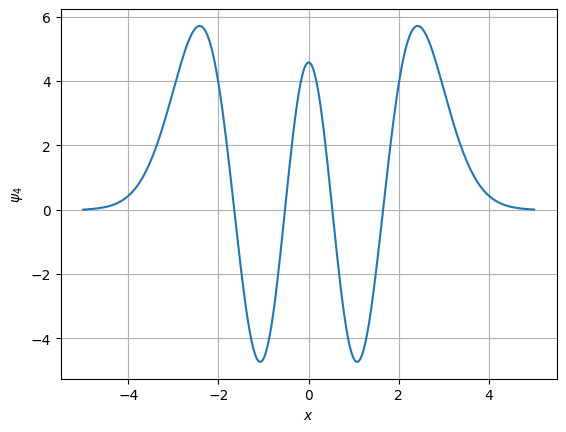

In [153]:
xs5_x, ys5_x = caller_rk4x(odefun, xlimx, yinix, Eeigen5_x, N,pot2);
y15_x = [y[0] for y in ys5_x];
plt.plot(xs5_x, y15_x);
plt.grid();
plt.xlabel("$x$")
plt.ylabel("$\\psi_4$")